In [10]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import string

No data available for option: Under 8.5 Goals. Skipping...


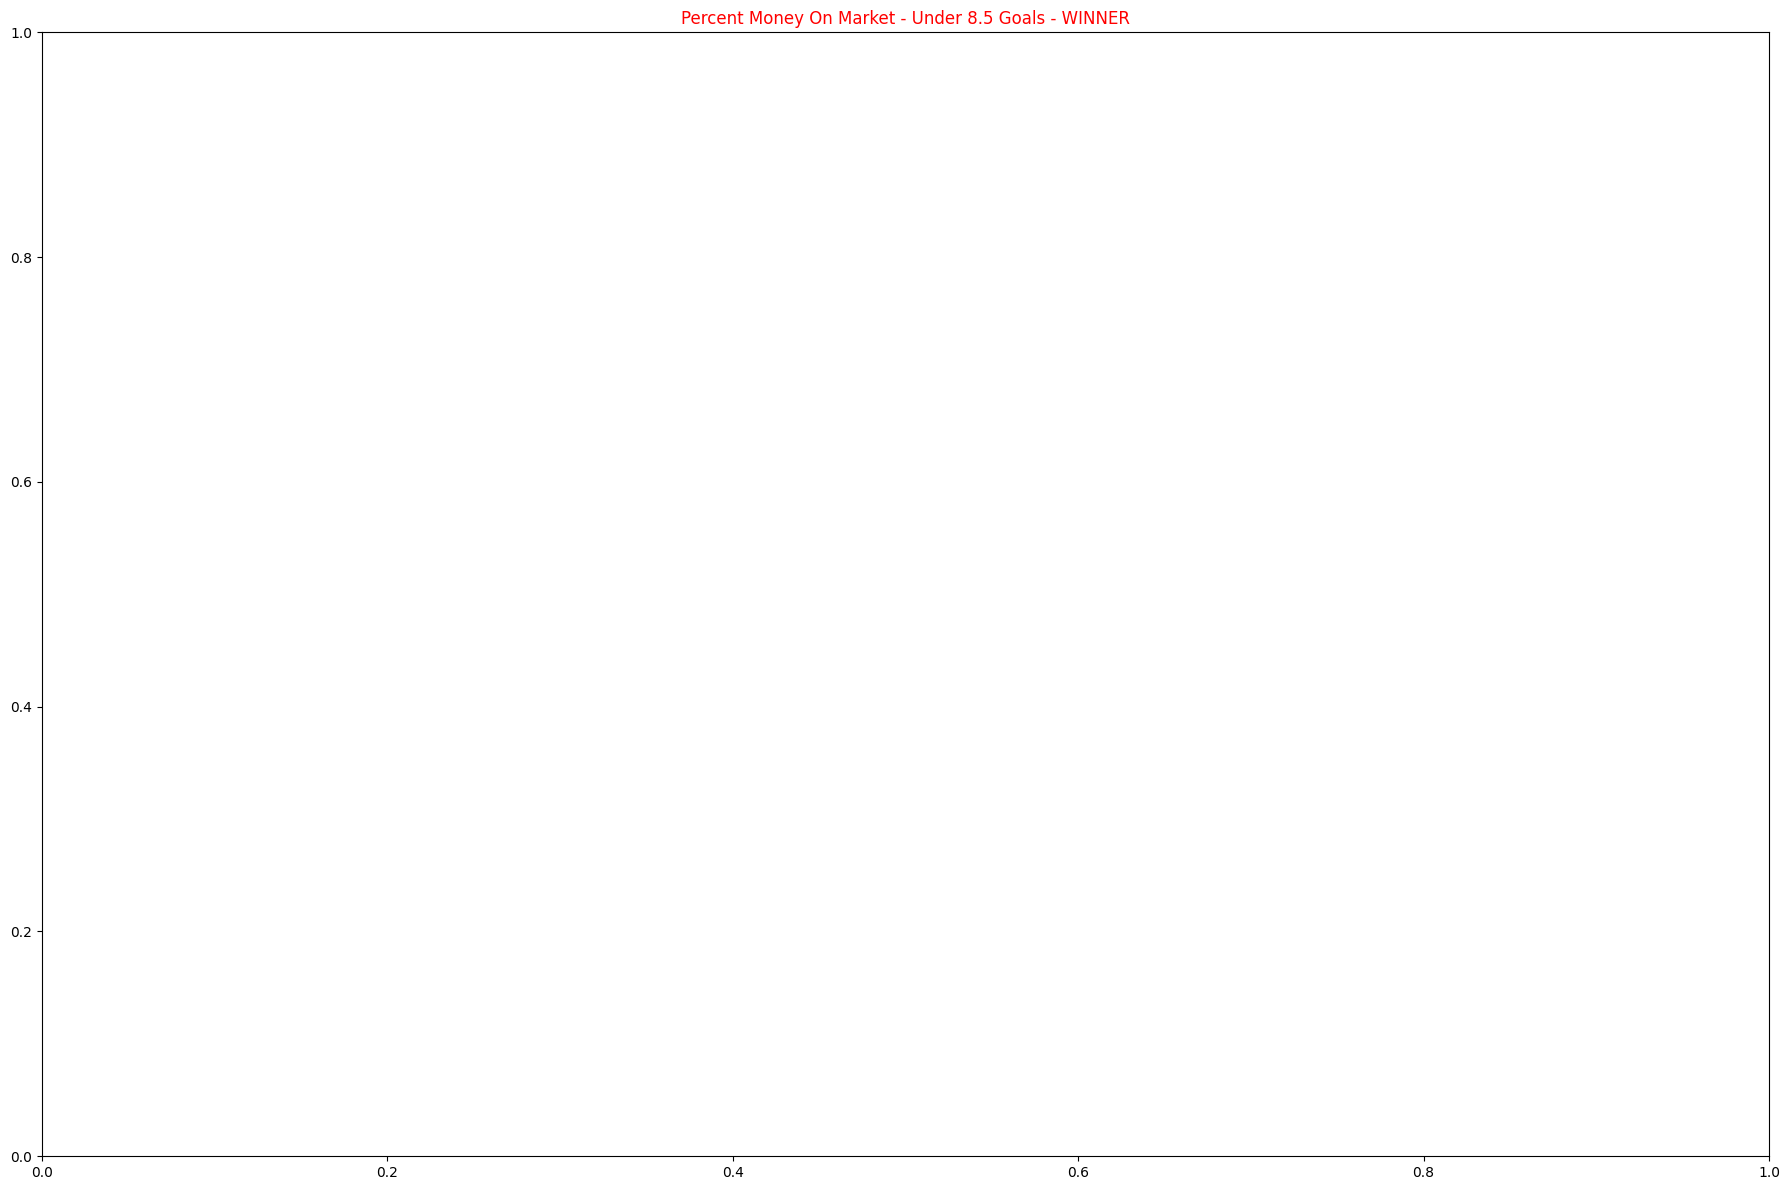

In [12]:

# Define the folder path
folder_path = "/Users/noahroni/Documents/Test/Dinamo Minsk_Slutsk"

# Get the list of all files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Iterate over each CSV file in the folder
for file_name in file_list:
    # Extract the part within parentheses from the file name
    folder_name = re.search(r'\((.*?)\)', file_name).group(1)

    # Remove the ".csv" extension from the file name
    file_name_without_extension = os.path.splitext(file_name)[0]
    
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Read the file into a DataFrame
    df = pd.read_csv(file_path, encoding='latin1')
        
    # Convert the 'selection_md.name' column to text format
    df['selection_md.name'] = df['selection_md.name'].astype(str)
    
    # Get the unique options available in the 'selection_md.name' column
    options = df['selection_md.name'].unique()
    
    # Iterate over each option
    for option in options:
        #print(option)
        
        # Filter the DataFrame based on the selected option
        filtered_df = df[df['selection_md.name'] == option]

        # Plot the chart
        fig, ax1 = plt.subplots(figsize=(18, 12))

        # Check if selection_status includes "WINNER" or "LOSER"
        status = ""
        if "WINNER" in filtered_df['selection_status'].values:
            status = "WINNER"
        elif "LOSER" in filtered_df['selection_status'].values:
            status = "LOSER"
                
                # Check if selection_status includes "WINNER" or "LOSER"
        status = ""
        if "WINNER" in filtered_df['selection_status'].values:
            status = "WINNER"
        elif "LOSER" in filtered_df['selection_status'].values:
            status = "LOSER"
                
        # Construct the title including status
        plt_title = f'Percent Money On Market - {option}'
        if status:
            plt_title += f" - {status}"
            plt_title_color = 'red' if status == "WINNER" else 'blue'  # Set title color based on status
        else:
            plt_title_color = 'black'
                
        plt.title(plt_title, color=plt_title_color)
        plt.tight_layout()

        filtered_df = filtered_df[filtered_df['percent_money_on_market'] != 0]
        
        # Check if the filtered DataFrame is not empty
        if not filtered_df.empty:
           
            # Extract relevant columns from the filtered DataFrame
            time_data = filtered_df['publishTime']
            percent_money_data = filtered_df['percent_money_on_market']          
            
            # Sort the time data
            time_data_sorted, percent_money_data_sorted = zip(*sorted(zip(time_data, percent_money_data)))
            
            ax1.plot(time_data_sorted, percent_money_data_sorted, label=option, linestyle='-', color='green')
            ax1.set_ylabel('Percent Money')
            ax1.set_xlabel('Time')
            ax1.tick_params(axis='x', labelrotation=80)
            ax1.legend()
            plt.tight_layout()
            
            # Define the output folder paths
            graphs_folder = os.path.join(folder_path, "Percent_Money_graphs")
            if not os.path.exists(graphs_folder):
                os.makedirs(graphs_folder)

            # Create a folder for each file
            output_folder = os.path.join(graphs_folder, folder_name)
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)

            # Remove characters that are not allowed in filenames
            valid_chars = "-_.() %s%s" % (string.ascii_letters, string.digits)
            option_filename = ''.join(c for c in option if c in valid_chars)
            
            # Define the output file path for the current option
            output_file = os.path.join(output_folder, f'{option_filename}.png')

            # Plot and save the graph for the current option
            plt.savefig(output_file)

            #plt.show()
            plt.close()

        else:
            print(f"No data available for option: {option}. Skipping...")

            # Close the figure to avoid the warning


In [14]:
# Define the folder path
folder_path = "/Users/noahroni/Documents/Test/Dinamo Minsk_Slutsk"

# Get the list of all files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Iterate over each CSV file in the folder
for file_name in file_list:
    # Extract the part within parentheses from the file name
    folder_name = re.search(r'\((.*?)\)', file_name).group(1)

    # Remove the ".csv" extension from the file name
    file_name_without_extension = os.path.splitext(file_name)[0]
    
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Read the file into a DataFrame
    df = pd.read_csv(file_path, encoding='latin1')
        
    # Convert the 'selection_md.name' column to text format
    df['selection_md.name'] = df['selection_md.name'].astype(str)
    
    # Get the unique options available in the 'selection_md.name' column
    options = df['selection_md.name'].unique()

    # Plot the chart
    fig, ax1 = plt.subplots(figsize=(18, 12))

    # Iterate over each option
    for option in options:
        print(option)

        # Filter the DataFrame based on the selected option
        filtered_df = df[df['selection_md.name'] == option]  
        
        filtered_df = filtered_df[filtered_df['percent_money_on_market'] != 0]
        
        # Check if the filtered DataFrame is not empty
        if not filtered_df.empty:

            # Convert 'publishTime' to datetime
            filtered_df['publishTime'] = pd.to_datetime(filtered_df['publishTime'])
            # Sort the filtered DataFrame by 'publishTime'
            filtered_df = filtered_df.sort_values(by=['publishTime'])

            # Extract relevant columns from the filtered DataFrame
            time_data = filtered_df['publishTime']
            percent_money_data = filtered_df['percent_money_on_market']          
            
            # Sort the time data
            time_data_sorted, percent_money_data_sorted = zip(*sorted(zip(time_data, percent_money_data)))

            # Plot the data for the current option
            ax1.plot(time_data_sorted, percent_money_data_sorted, label=option, linestyle='-')
            plt.tight_layout()

            # Check if selection_status includes "WINNER" or "LOSER"
            status = ""
            if "WINNER" in filtered_df['selection_status'].values:
                status = "WINNER"
            elif "LOSER" in filtered_df['selection_status'].values:
                status = "LOSER"
                    
            # Check if selection_status includes "WINNER" or "LOSER"
            status = ""
            if "WINNER" in filtered_df['selection_status'].values:
                status = "WINNER"
            elif "LOSER" in filtered_df['selection_status'].values:
                status = "LOSER"
                    
            # Construct the title including status
            plt_title = f'Percent Money On Market - {option} is WINNER'
            if status:
                plt_title += f" - {status}"
                plt_title_color = 'red' if status == "WINNER" else 'blue'  # Set title color based on status
            else:
                plt_title_color = 'black'
                    
            plt.title(plt_title, color=plt_title_color)
            plt.tight_layout()

    # Set labels and title
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Percent Money')
    ax1.tick_params(axis='x', labelrotation=75)
    # Format the x-axis tick labels
    ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
    date_format = mdates.DateFormatter('%d:%m:%Y %H:%M:%S')
    ax1.xaxis.set_major_formatter(date_format)
    ax1.legend(loc='upper right')
    plt.tight_layout()

    # Define the output folder paths
    graphs_folder = os.path.join(folder_path, "Percent_Money_graphs")
    if not os.path.exists(graphs_folder):
        os.makedirs(graphs_folder)

            # Create a folder for each file
    output_folder = os.path.join(graphs_folder, folder_name)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

            # Define the output file path
    output_file = os.path.join(output_folder, f'{file_name_without_extension}.png')

            # Save the graph
    plt.savefig(output_file)

    #plt.show()
    plt.close()
      


Dinamo Minsk_Slutsk(OverUnder1.5Goals).csv
Under 1.5 Goals
Over 1.5 Goals
Dinamo Minsk_Slutsk(HalfTimeScore).csv
0 - 0
1 - 1
2 - 2
1 - 0
2 - 0
2 - 1
0 - 1
0 - 2
1 - 2
Any Unquoted 
Dinamo Minsk_Slutsk(DrawnoBet).csv
Dinamo Minsk
Slutsk
Dinamo Minsk_Slutsk(OverUnder8.5Goals).csv
Under 8.5 Goals
Over 8.5 Goals
Dinamo Minsk_Slutsk(MatchOdds).csv
Dinamo Minsk
Slutsk
The Draw
Dinamo Minsk_Slutsk(HalfTimeFullTime).csv
Dinamo Minsk/Dinamo Minsk
Dinamo Minsk/Draw
Dinamo Minsk/Slutsk
Draw/Dinamo Minsk
Draw/Draw
Draw/Slutsk
Slutsk/Dinamo Minsk
Slutsk/Draw
Slutsk/Slutsk
Dinamo Minsk_Slutsk(AsianHandicap).csv
Dinamo Minsk
Slutsk
Dinamo Minsk_Slutsk(OverUnder4.5Goals).csv
Under 4.5 Goals
Over 4.5 Goals
Dinamo Minsk_Slutsk(BothteamstoScore?).csv
Yes
No
Dinamo Minsk_Slutsk(FirstHalfGoals2.5).csv
Under 2.5 Goals
Over 2.5 Goals
Dinamo Minsk_Slutsk(OverUnder7.5Goals).csv
Under 7.5 Goals
Over 7.5 Goals
Dinamo Minsk_Slutsk(DinamoMinsk+1).csv
Dinamo Minsk +1
Slutsk -1
Draw
Dinamo Minsk_Slutsk(FirstHalfGoal